# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

Q 1.1 - 1.3 pictures of work uploaded

Q 1.4
Yes, a non-decreasing transformation of the median is the median of the transformed variable. Since the median of the data is the middle value of the ordered data, and it is non-decreasing, the order of the data would not be affected and the median would be the same. This also applies to quantiles because they are based on a ranked order and a non-decreasing transformatioon would maintain the order like with the median.
For IQR, which is between 25th and 75th percentile, a non-decreasing transformation still wouldn't change order but it might not be the same for the transformed variable because it may not preserve the spacing between the values. For the range, it should be the same.


Q 1.5 No I don't think it's necessarily true that m(g(X)) = g(m(X)) when g is a non-decreasing transformation. This preservation property would seem to only hold for linear functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns # Import Seaborn

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [3]:
# load in the data set
# read in airbnb csv file
df = pd.read_csv('https://raw.githubusercontent.com/kpunsalan8/DS-3001-EDA-KP/refs/heads/main/assignment/data/ForeignGifts_edu.csv',low_memory=False)

In [4]:
# inspect df
df.head(5)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [13]:
print(df['Foreign Gift Amount'].describe())

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


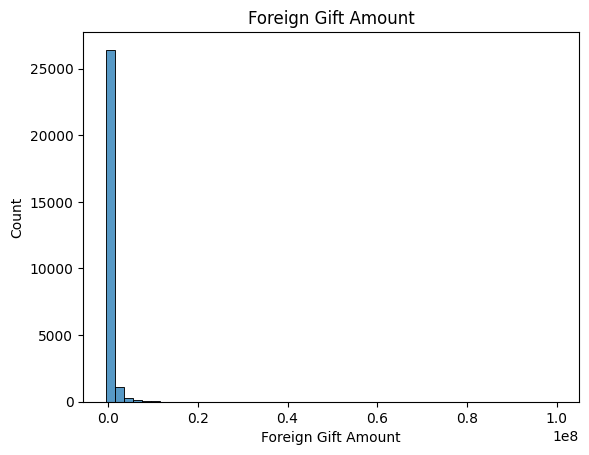

In [20]:
var = 'Foreign Gift Amount'
sns.histplot(df[var], bins=50)
plt.title('Foreign Gift Amount')
plt.show()

**Findings about Foreign Gift Amount variable:**
The highest gift amount is extremely high (1.0e+8) and definitely a high outlier of the data. There is also a negative minimum according to the data description which is a bit odd.

In [16]:
# value counts of Gift Type var
print(df['Gift Type'].value_counts())

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64


**What proportion of the gifts are contracts, real estate, and monetary gifts?**

* Contracts = 17274/28221 = ~61.21 %
* Real Estate = 11/28221 = ~0.03 %
* Monetary Gift = 10936/28221 = ~38.75 %

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


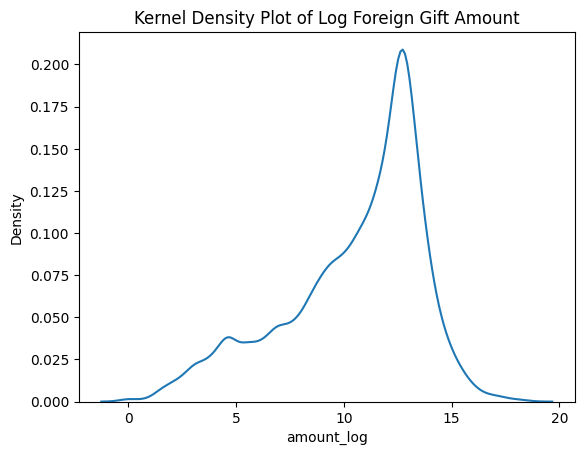

In [21]:
# kernel density plot of the log of Foreign Gift Amount
df['amount_log'] = np.log(df['Foreign Gift Amount'])

var = 'amount_log'
sns.kdeplot(df[var])
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.show()

[Text(0.5, 1.0, 'Gift Amounts Conditional on Gift Type')]

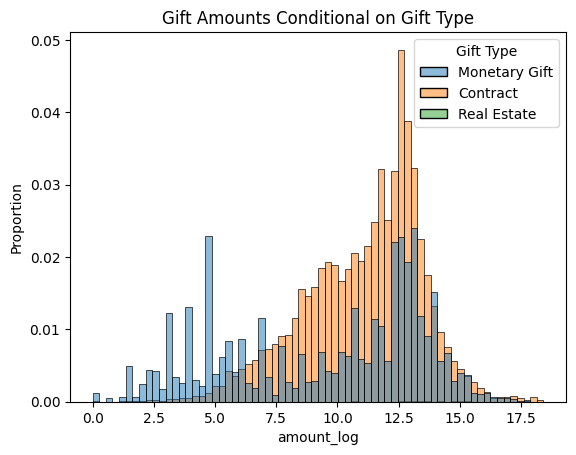

In [22]:
# kernel density plot of the log of Foreign Gift Amount conditional on gift type
conditioning = 'Gift Type'
var = 'amount_log'
fig = sns.histplot( data=df, x=var, hue=conditioning, stat='proportion')
fig.set(title='Gift Amounts Conditional on Gift Type')

**Do you notice any patterns?**

Contract gifts seem to account for higher gift amounts, and the monetary gifts are pretty dispersed but account for most of the lower gift amounts. It is not clear the trend for Real Estate gifts based on this plot as there are so few of them.

In [24]:
# What are the top 15 countries in terms of the number of gifts?
top_num_gift = df.groupby('Country of Giftor').count()['Foreign Gift Amount'].sort_values(ascending=False).head(15)
display(top_num_gift)

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [25]:
# What are the top 15 countries in terms of the amount given?
top_sum_gift = df.groupby('Country of Giftor').sum()['Foreign Gift Amount'].sort_values(ascending=False).head(15)
display(top_sum_gift)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [26]:
# What are the top 15 institutions in terms of the total amount of money they receive?
top_inst_sum = df.groupby('Institution Name').sum()['Foreign Gift Amount'].sort_values(ascending=False).head(15)
display(top_inst_sum)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


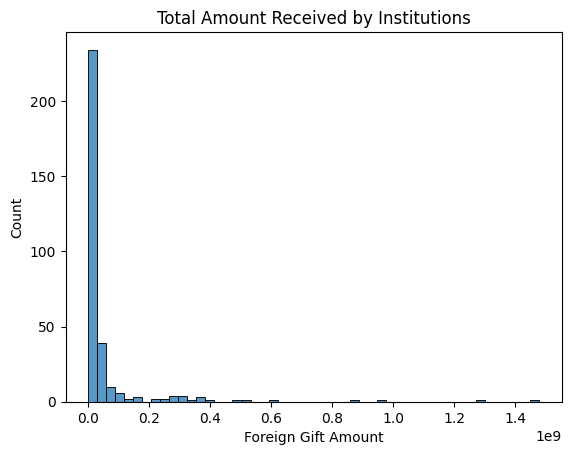

In [27]:
# histogram of the total amount received by all institutions
sns.histplot(df.groupby('Institution Name').sum()['Foreign Gift Amount'], bins=50)
plt.title('Total Amount Received by Institutions')
plt.show()

In [28]:
# Which giftors provide the most money, in total?
top_giftors = df.groupby('Giftor Name').sum()['Foreign Gift Amount'].sort_values(ascending=False).head(15)
display(top_giftors)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [16]:
# load in data
link = 'https://raw.githubusercontent.com/kpunsalan8/DS-3001-EDA-KP/refs/heads/main/assignment/data/airbnb_hw.csv'

df = pd.read_csv(link,low_memory=False)

In [17]:
print(df.shape, '\n')
row_count = len(df)
print(row_count)
print(df.columns, '\n')

(30478, 13) 

30478
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



In [18]:
df.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [19]:
# Cross tabulate Room Type and Property Type.
room_property = pd.crosstab(df['Room Type'], df['Property Type'])
display(room_property)

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


**What patterns do you see in what kinds of rentals are available?**

Shared rooms seem to be the least common room type except for the Dorm property type. Apartment, House, and Loft seem to be the most common property types.


**For which kinds of properties are private rooms more common than renting the entire property?**
Private rooms are more common than renting the entire property for: Bed & Breakfasts, Dorms, Houses, and the Other category

In [20]:
# coerce price to numeric
var = 'Price'
df[var] = pd.to_numeric(df[var], errors='coerce')

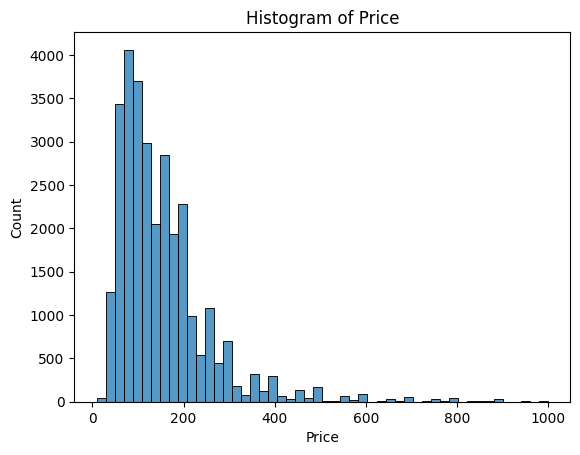

In [36]:
# Price histogram
sns.histplot(df['Price'], bins=50)
plt.title('Histogram of Price')
plt.show()

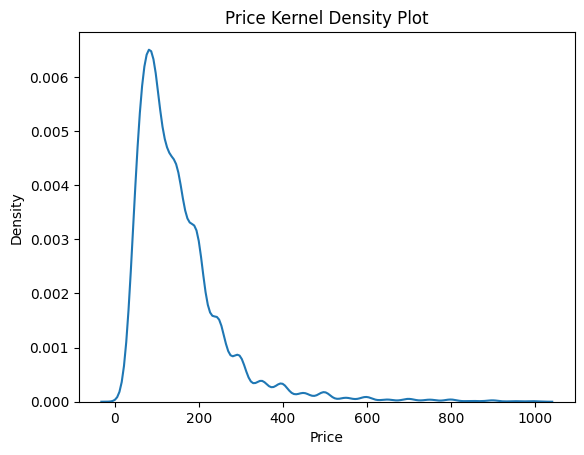

In [37]:
# Price kernel density
sns.kdeplot(df['Price'])
plt.title('Price Kernel Density Plot')
plt.show()

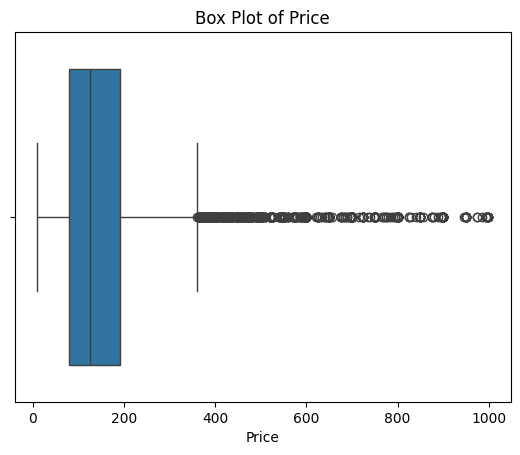

In [39]:
# Price box plot
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.show()

In [15]:
# Price statistical description
display(df['Price'].describe())

,Price
count,30478
unique,511
top,150
freq,1481


**Are the data badly scaled? Are there many outliers?**
The range of the data is quite large going from 10 to 999. There seem to be quite a few outliers looking at the box plot.

In [21]:
# Use log to transform price into a new variable, price_log
df['price_log'] = np.log(df['Price'])

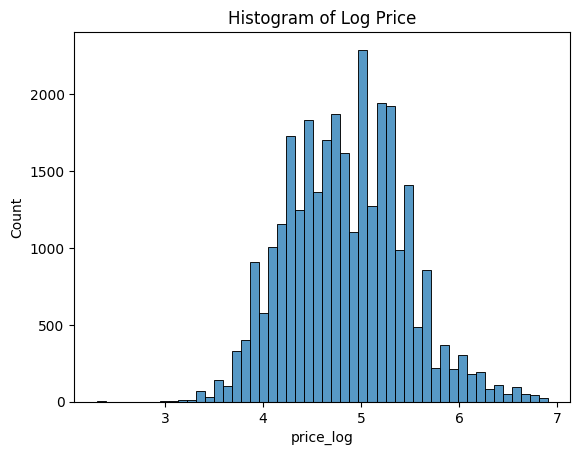

In [42]:
# log price histogram
sns.histplot(df['price_log'], bins=50)
plt.title('Histogram of Log Price')
plt.show()

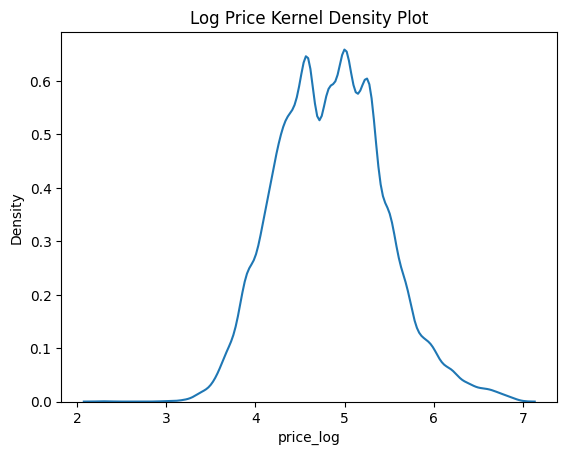

In [43]:
# log price kernel density
sns.kdeplot(df['price_log'])
plt.title('Log Price Kernel Density Plot')
plt.show()

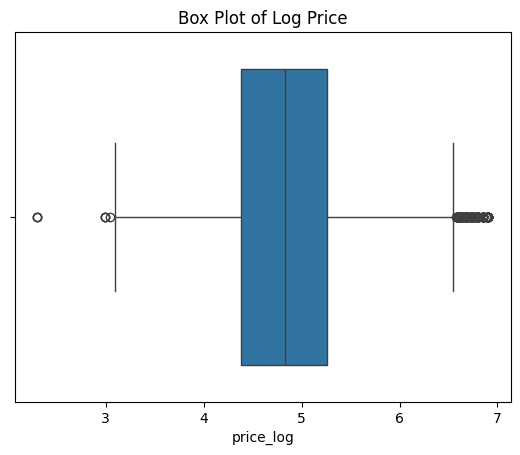

In [44]:
# log price box plot
sns.boxplot(x=df['price_log'])
plt.title('Box Plot of Log Price')
plt.show()

In [22]:
# log price describe
display(df['price_log'].describe())

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


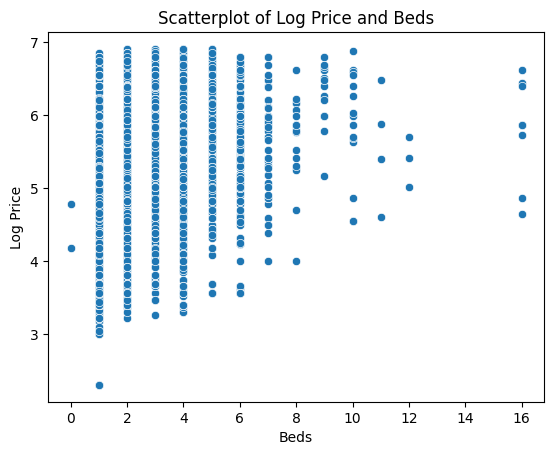

In [46]:
# Make a scatterplot of price_log and Beds.
sns.scatterplot(x=df['Beds'], y=df['price_log'])
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.title('Scatterplot of Log Price and Beds')
plt.show()

**Describe what you see.**
There is a range of prices from low to high for even the lowest amounts of beds, but it is clear that the baseline price increases as the number of beds increases.

In [24]:
# Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds.
display(df.groupby('Beds')['Price'].describe())

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


**Describe any patterns you see in the average price and standard deviation in prices.**

The Mean prices do seem to increase steadily as the number of beds increases. There are a few dips in price from 7 beds to 12 beds (at 8, 11, and 12) which might mean that once it hits this many beds (7+) the number is not the main factor determining average price. There is a large increase in price for 16 beds. The standard deviation also seems to increase steadily with mean as the number of beds increases signifying higher variability and a wider range of prices for increasing amounts of beds. The standard deviation only clearly dips at 8 and 12 beds which just signifies lower range of data points at those amounts.

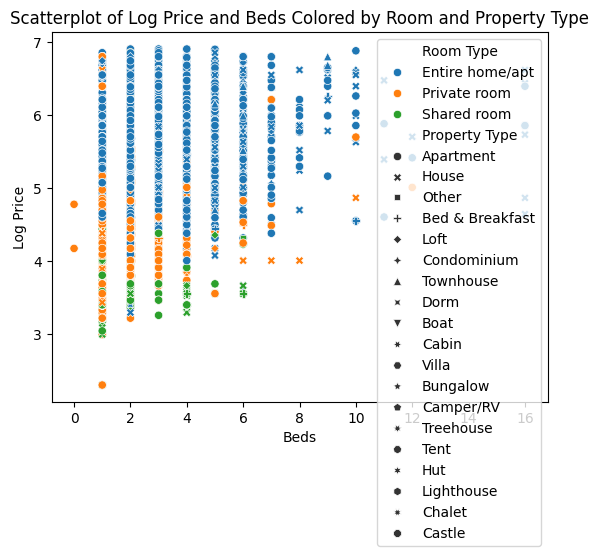

In [48]:
# scatterplot of price_log and Beds, but color the graph by Room Type and Property Type.
sns.scatterplot(x='Beds', y='price_log', hue='Room Type', style='Property Type', data=df)
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.title('Scatterplot of Log Price and Beds Colored by Room and Property Type')
plt.show()

**What patterns do you see?**  Shared rooms tend to be cheaper, renting an entire room/apt seems to be more expensive, and renting a private room seems to be dispersed on both cheaper and more expensive sides, sitting right in the middle.

In [49]:
# Compute a description of Price conditional on Room Type and Property Type.
display(df.groupby(['Room Type', 'Property Type'])['Price'].describe())

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

**Which Room Type and Property Type have the highest prices on average?**
* Room Type with highest average prices: Entire home/apt
* Property Type with highest average prices: the Other category

**Which have the highest standard deviation?**
* Room Type with highest standard deviation: Entire home/apt
* Property Type with highest standard deviation: the Other category

**Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?** The median may be a more reliable estimate of central tendency, because in some categories there are very high outliers that seem to possibly skew the mean a bit on the higher side when it actually doesn't reflect the data as well.

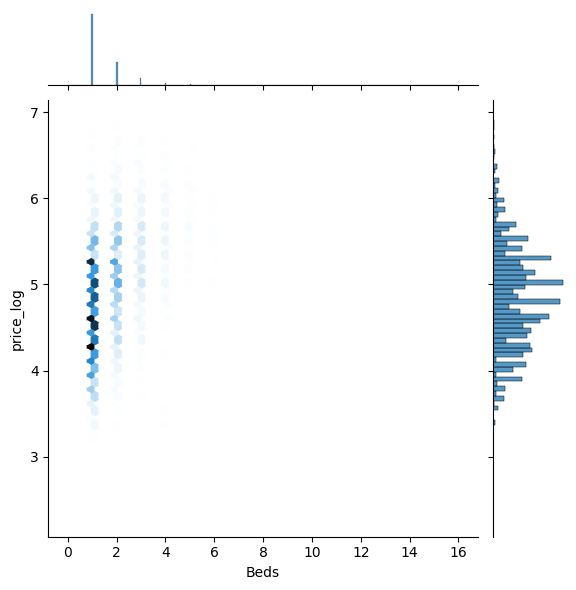

In [50]:
# Use seaborn to make a jointplot with kind=hex with price_log and Beds
sns.jointplot(data=df, x='Beds', y='price_log', kind='hex')
plt.show()

**Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?**
The data are mostly concentrated around price_log value of 4 and 5. I think just looking at the scatterplots from 5 and 6, it is harder to tell where the majority of the data are concentrated. One might think that the data was also very concentrated at higher prices looking at the earlier plots.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [3]:
# load in data

link = 'https://raw.githubusercontent.com/ds4e/EDA/refs/heads/main/assignment/data/drilling_rigs.csv'

df = pd.read_csv(link,low_memory=False)

In [4]:
# examine data
print(df.shape, '\n')
print(df.columns, '\n')
print(df.dtypes, '\n')

(623, 10) 

Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object') 

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)          

In [5]:
df.head(5)

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


Data that need to be cleaned: all the numbers that aren't numeric need to be cast to numeric, Month variable needs to be cleaned, it contains month and year

In [6]:
# clean data
# coerce variables to numeric
df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')
df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'] = pd.to_numeric(df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'], errors='coerce')
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'] = pd.to_numeric(df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'], errors='coerce')
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'] = pd.to_numeric(df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'], errors='coerce')
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

In [7]:
# convert the Month variable to an ordered datetime variable
# use df['time'] = pd.to_datetime(df['Month'], format='mixed')
df['Time'] = pd.to_datetime(df['Month'], format='mixed')

In [8]:
# look at data again
df.head(5)

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),Time
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0,1973-01-01
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0,1973-02-01
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0,1973-03-01
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0,1973-04-01
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0,1973-05-01


[Text(0.5, 1.0, 'Total number of rigs over time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Rigs')]

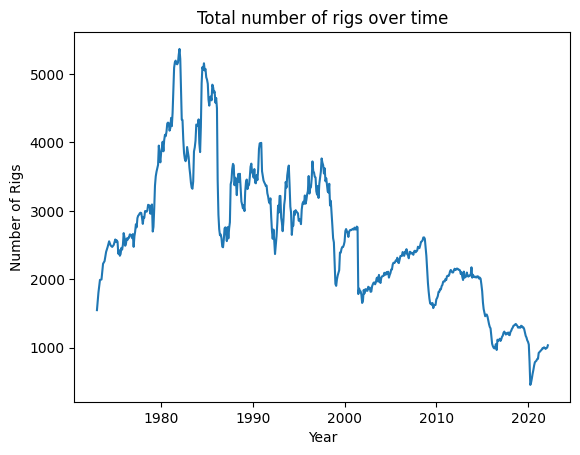

In [10]:
# Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time.
# Make a line plot of this time series.

fig = sns.lineplot(data = df, x = 'Time',
                   y = 'Active Well Service Rig Count (Number of Rigs)')
fig.set(title="Total number of rigs over time",
        xlabel='Year', ylabel='Number of Rigs')


**Describe what you see.**
I see two of the highest peaks in the early 1980s. The largest drop in the amount of active rigs seems to occur in the later 80s. Overall the totally number of rigs seems to be declining over the years.

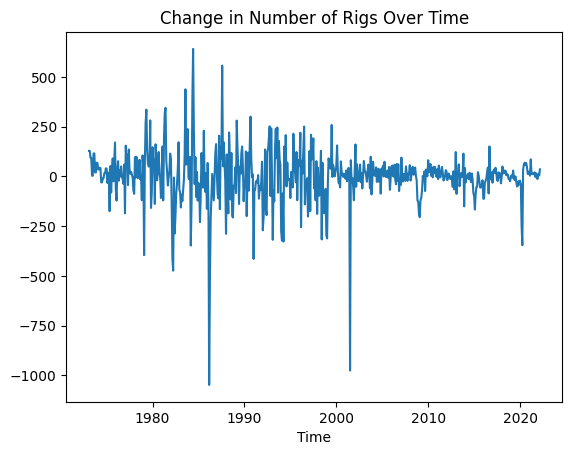

In [11]:
# we want to look at change over time.
# Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time.
y = df['Active Well Service Rig Count (Number of Rigs)'].to_numpy()
t = len(y)

diff = y[1:]-y[:(t-1)] # First difference of Active Well Service Rig Count (Number of Rigs)

fig = sns.lineplot(x=df['Time'][1:],y=diff)
fig.set(title='Change in Number of Rigs Over Time')
plt.show()

**Describe what you see.** I see very large negative changes in the number of rigs in the late 1980s and just after 2000, which mirrors large drops in levels that occur in the lineplot above.

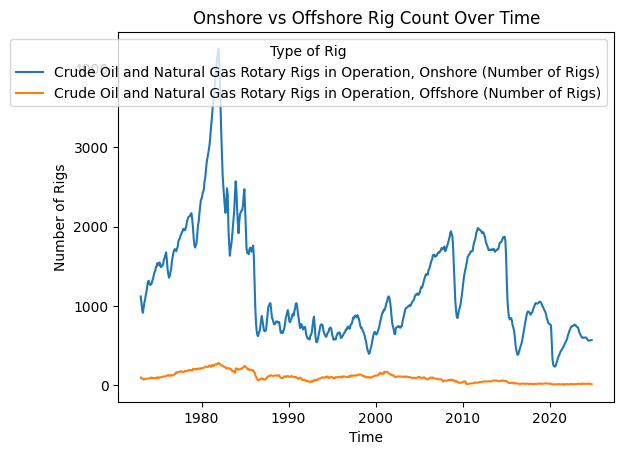

In [12]:
# The first two columns are the number of onshore and offshore rigs, respectively.
# Melt these columns and plot the resulting series.
on_off_melted = df.melt(id_vars=['Time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                                                      'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                    var_name='Rig Type', value_name='Rig Count')

sns.lineplot(data=on_off_melted, x='Time', y='Rig Count', hue='Rig Type')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rig Count Over Time')
plt.legend(title='Type of Rig')
plt.show()